In [6]:
from activephasemap.simulators import UVVisExperiment
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [7]:
ITERATION = 14

In [8]:
design_space_bounds = [(0.0, 35.0), (0.0, 35.0)]
expt = UVVisExperiment(design_space_bounds, "../data/")
expt.read_iter_data(ITERATION)
expt.generate(use_spline=True)

Loading data from iteration 0 with shapes: (12, 2) (12, 101)
Loading data from iteration 1 with shapes: (6, 2) (6, 101)
Loading data from iteration 2 with shapes: (6, 2) (6, 101)
Loading data from iteration 3 with shapes: (6, 2) (6, 101)
Loading data from iteration 4 with shapes: (6, 2) (6, 101)
Loading data from iteration 5 with shapes: (6, 2) (6, 101)
Loading data from iteration 6 with shapes: (6, 2) (6, 101)
Loading data from iteration 7 with shapes: (6, 2) (6, 101)
Loading data from iteration 8 with shapes: (6, 2) (6, 101)
Loading data from iteration 9 with shapes: (6, 2) (6, 101)
Loading data from iteration 10 with shapes: (6, 2) (6, 101)
Loading data from iteration 11 with shapes: (6, 2) (6, 101)
Loading data from iteration 12 with shapes: (6, 2) (6, 101)
Loading data from iteration 13 with shapes: (6, 2) (6, 101)


In [9]:
comps = expt.comps

In [10]:
CTAB = 96
GCH = 59
GS = 24 
n_samples = len(comps)
SN = np.round(comps[:,0].reshape(-1,1)).astype(int)
AA = np.round(comps[:,1].reshape(-1,1)).astype(int)
CTAB_ = np.array([CTAB]*n_samples).reshape(-1,1)
GCH_ = np.array([GCH]*n_samples).reshape(-1,1)
GS = np.array([GS]*n_samples).reshape(-1,1)

volumes = np.hstack((CTAB_, GCH_, AA, SN, GS))
WATER = 300 - np.sum(volumes, axis=1).reshape(-1,1)
volumes_ = np.hstack((CTAB_, WATER, GCH_, AA, SN, GS))
volume_df = pd.DataFrame(volumes_, columns=['CTAB', 'Water', 'GCH', 'AA', 'SN', 'GS'])
volume_df

,CTAB,Water,GCH,AA,SN,GS
0,96,89,59,7,25,24
1,96,81,59,28,12,24
2,96,106,59,13,2,24
3,96,68,59,22,31,24
4,96,77,59,17,27,24
...,...,...,...,...,...,...
85,96,90,59,21,10,24
86,96,111,59,2,8,24
87,96,73,59,25,23,24
88,96,94,59,11,16,24


In [11]:
print("Total volumes needed : \n", volume_df.sum())

Total volumes needed : 
 CTAB     8640
Water    7864
GCH      5310
AA       1635
SN       1391
GS       2160
dtype: int64


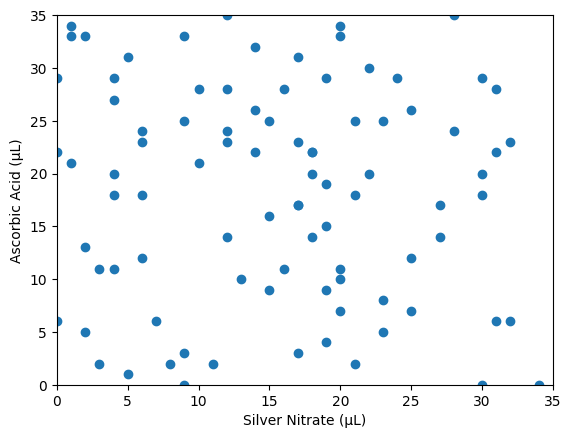

In [13]:
fig, ax = plt.subplots()
bounds = np.asarray(design_space_bounds).T
ax.scatter(volume_df["SN"], volume_df["AA"])
ax.set_xlim([bounds[0,0], bounds[1,0]])
ax.set_ylim([bounds[0,1], bounds[1,1]])
ax.set_xlabel("Silver Nitrate (µL)")
ax.set_ylabel("Ascorbic Acid (µL)")
plt.show()

In [15]:
volume_df.to_csv('../opentrons/volumes_all_iters.csv',index=False)